In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode



In [2]:
pip install pandas numpy matplotlib plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
init_notebook_mode(connected=True)


In [9]:
tesla=pd.read_csv("C:\\Users\\HP\\Desktop\\jupyter projects\\tesla.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [6]:
tesla['Date']=pd.to_datetime(tesla['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_24840\3603082750.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [8]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total days={(tesla.Date.max() - tesla.Date.min()).days} days')


Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days=3181 days


In [11]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

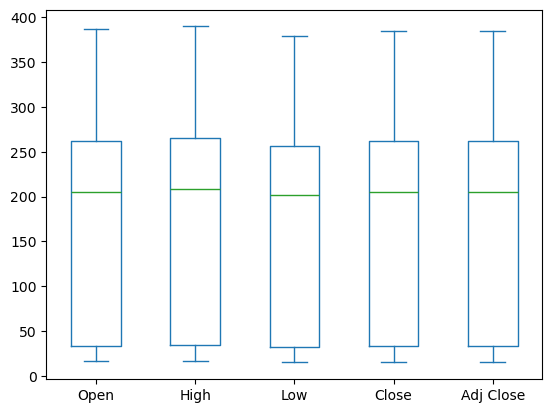

In [12]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [15]:
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',  # Added comma
            size=18,                          # Added comma
            color='#7f7f7f'
        ) 
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',  # Fixed typo
            size=18,                          # Added comma
            color='#7f7f7f'
        )  
    ) 
)

tesla_data = [{"x": tesla['Date'], 'y': tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)


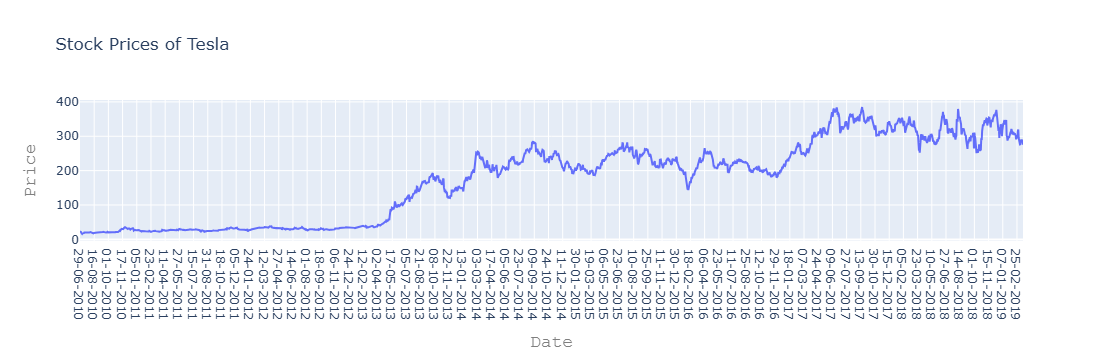

In [16]:
iplot(plot)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [18]:
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)


In [19]:
scaler=StandardScaler().fit(X_train)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [25]:
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode="markers",  # Corrected 'makers' to 'markers'
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode="lines",
    name="Predicted"
)

tesla_data = [trace0, trace1]

layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Day',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot2 = go.Figure(data=tesla_data, layout=layout)


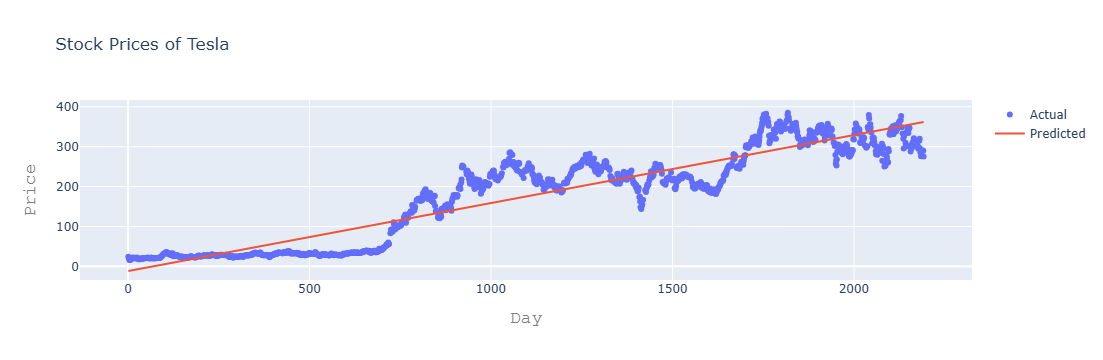

In [26]:
iplot(plot2)

In [27]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)






Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

